# Perceptron

Es la representación más simple de una neurona, su salida es de característica binaria (1, 0) y depende de una combinación lineal de las señales de entrada. El esquema visual de un perceptrón puede entenderse de la siguiente manera:

<p align="center">
  <img width="700" src="https://www.notion.so/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F41092d10-449a-4811-a3e6-72cb4fbbc9d6%2FUntitled.png?table=block&id=9ef4c507-d4b5-464f-909a-5e785b3ab8ac&width=1880&userId=5d54f20c-b387-4e7e-b2a5-d88e235ada88&cache=v2">
</p>

donde, 

- ➡️ Las señales de entradas son números que se multiplican por los pesos sinápticos. 

- ➡️ La multiplicación entra a la *Unión sumadora*.

- ➡️ La unión sumadora agrupa los resultados, y los envía a la función de activación. 

- ➡️ La función de activación sirve como filtro para discernir sobre la información objetivo, ya que esta solo se activa si el resultado supera cierto umbral.



# Objeto de estudio

El perceptrón será aplicado sobre el Famoso set de datos [IRIS](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) que contiene información de 3 diferentes especies (target):

* Iris-Setosa (0)
* Iris-Versicolor (1)
* Iris-Virginica (2)

El dataset contiene 150 muestras (50 por cada especie) y 4 características:

* Longitud del sepalo (cm)
* Ancho del sepalo (cm)
* Longitud del petalo (cm)
* Ancho del petalo (cm)



In [ ]:
# Configuraciones iniciales

# importar datos y modelo
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# para la manipulación de datos
import numpy as np
import pandas as pd

# para la visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('Set1')

#sns.set_palette('Set1')
%matplotlib inline

In [ ]:
# cargar dataset 
iris = load_iris()

# cargar dataset en pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# definir variables objetivos
labels = iris.target

## Análisis exploratorio inicial: clasificación de acuerdo a la longitud y ancho del pétalo

In [ ]:
df_petal = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
df_petal.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
labels_name = []
for i in labels:
  if i == 0:
    labels_name.append('Setosa')
  elif i == 1:
    labels_name.append('Versicolor')
  elif i == 2:
    labels_name.append('Virginica')

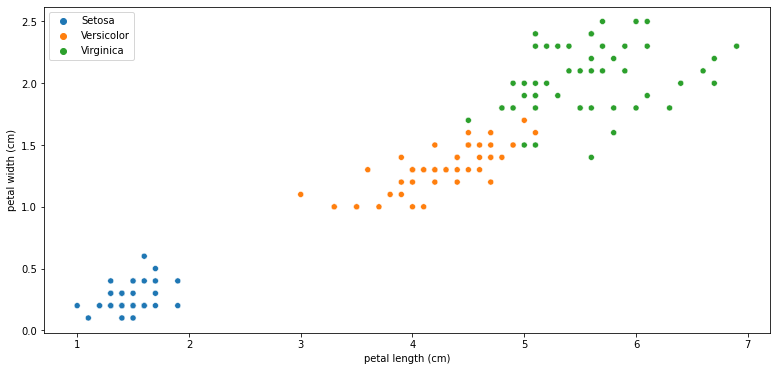

In [ ]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="petal length (cm)",
                y="petal width (cm)",
                data=df_petal,
                hue=labels_name)
plt.show()

Cada especie tiene su color representativo en la gráfica, lo cual hace que la clasificación sea muy evidente. Ahora se implementara la arquitectura del perceptrón con la intención de que el algoritmo logre identificar estos patrones y así sea capaz de realizar predicciones. 


# Implementando el perceptrón en una clasificación binaria: ¿Es iris virginica o no?

In [ ]:
X = df_petal
y = iris.target

# separacion de datos
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)

# clasificacion
y_training = (y_train==2).astype(np.int)
y_testing = (y_test==2).astype(np.int)

# arquitectura perceptron
perceptron_ = Perceptron()

# entrenamiento
perceptron_.fit(X_train, y_training)

# prediccion
y_predict = perceptron_.predict(X_test)
accuracy = perceptron_.score(y_testing,y_predict)
print(f"Accuracy del perceptrón:' {round(accuracy,3)}")

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Ahora que se ha entrenado el modelo con sus configuraciones por defecto, evaluemos rápidamente su predicción con estas dos condiciones: 

1. ¿Es iris virginica un pétalo de 5.1 cm de longitud y de 2 cm de ancho?
2. ¿Es iris virginica un pétalo de 1.4 cm de longitud y 0.2 cm de ancho?

In [ ]:
# prediccion
y1_pred = test_perceptron_.predict([[5.1, 2]])
y2_pred = test_perceptron_.predict([[1.4, 0.2]])
print(f"Predicción 1: {y1_pred}, Predicción 2:{y2_pred}")

Predicción 1: [1], Predicción 2:[0]


De acuerdo al modelo, la primeras características corresponden a una flor de la especie Virginica, mientras que la otra no. Grafiquemos los resultados para evaluar su desempeño.

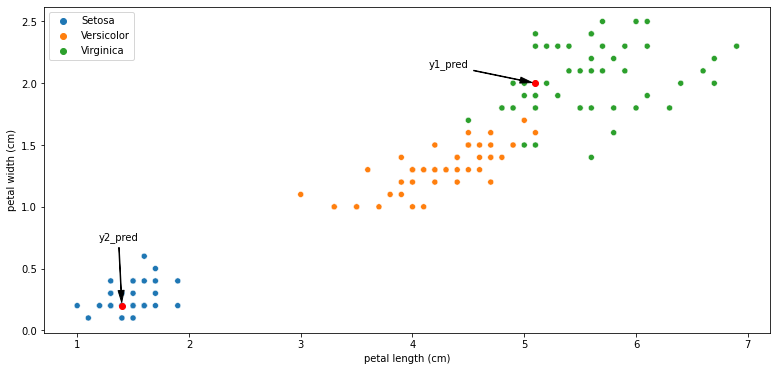

In [ ]:
plt.figure(figsize=(13,6))
sns.scatterplot(x="petal length (cm)",
                y="petal width (cm)",
                data=df_petal,
                hue=labels_name)

plt.plot(5.1,2,'ro') 
plt.annotate('y1_pred', xy=(5.1,2), xytext=(4.5,2.2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6),
            horizontalalignment='right', verticalalignment='top')

plt.plot(1.4,0.2,'ro') 
plt.annotate('y2_pred', xy=(1.4,0.2), xytext=(1.55,0.8), 
             arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=6),
            horizontalalignment='right', verticalalignment='top')
plt.show()

Con esta visualización, encontramos que el algoritmo ha sido capaz de clasificar correctamente.

*El* Perceptrón permite implementar **clasificadores binarios muy simples**, sin embargo a la hora de enfrentar problemas más complejos como la identificación de patrones se recurre a combinar múltiples perceptrones.